In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
def RGB_to_YCbCr(img):
    R, G, B = img[..., 2], img[..., 1], img[..., 0]
    Y = 0.299 * R + 0.5870 * G + 0.114 * B
    Cb = -0.1687 * R - 0.3313 * G + 0.5 * B + 128
    Cr = 0.5 * R - 0.4187 * G - 0.0813 * B + 128
    return [Y, Cb, Cr]

def YCbCr_to_RGB(img):
    Y, Cb, Cr = img[..., 0], img[..., 1], img[..., 2]
    R = Y + (Cr - 128) * 1.402
    G = Y - (Cb - 128) * 0.3441 - (Cr - 128) * 0.7139
    B = Y + (Cb - 128) * 1.7718
    return [R, G, B]

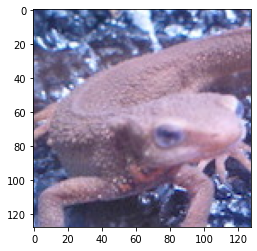

In [8]:
img = cv2.imread("../imori.jpg")
H, W, ch = img.shape
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [23]:
Y, Cb, Cr = RGB_to_YCbCr(img)
Y *= 0.7
print(np.swapaxes(np.swapaxes(np.array([Y, Cb, Cr]), 0, 2), 0, 1).shape)
converted_img = np.swapaxes(np.swapaxes(np.array([Y, Cb, Cr]), 0, 2), 0, 1)
R, G, B = YCbCr_to_RGB(converted_img)
output_img = np.swapaxes(np.swapaxes(np.array([B, G, R]), 0, 2), 0, 1)
output_img = np.clip(output_img, 0, 255).astype("uint8")

(128, 128, 3)


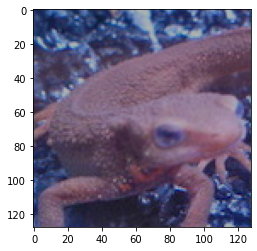

In [24]:
plt.imshow(cv2.cvtColor(output_img, cv2.COLOR_BGR2RGB))
plt.show()